В задании был задан вопрос. Почему именно такая зависимость между точностью и числом соседей?

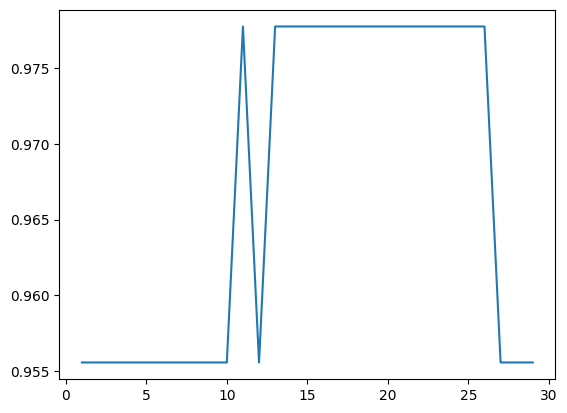

Для ответа на вопрос, произведем визуализацию предсказаний и разделяющих плоскостей.

Для того, чтобы быстрее и удобнее визуализировать данные на 2D-плоскости, будем пользоваться только двумя последними фичами датасета.

**Почему именно двумя последними?** Если вернуться выше, то мы можем видеть в документации датасета `iris_dataset.DESCR`, что две последние фичи являются самыми корреллирующимися с нашими целевыми переменными.

**Дополнение:** В силу корреляции фич с таргетом мы можем наиболее наглядно представить разделяющую плоскость.

**А почему именно двумя (а не тремя или одним)?** Все просто -- для визуализации на плоскости нам нужно как раз два измерения -- это ось абсцисс и ординат. Разумеется, выбор двух фичей -- не самая лучшая затея (и не самая практичная и широко применимая), поэтому для реальных задач лучше пользоваться методами для понижения размерности (PCA, SVD и др.), но так как у нас самые сильные корелляции уже приходятся на 2 последние фичи -- мы просто можем взять их.

### Проведем анализ ошибок

Как ошибки связаны с расстоянием до других объектов класса?

**Ответ:** Нельзя сказать, что прямо пропорциональна ошибкам, но она есть. knn делает предсказания в первую очередь на основе расстояний до объектов, а потом на основе классов этих самых ближайших объектов. Если k слишком большое (сравнимое с количеством объектов какого-то класса), то модель может делать неверные выводы исключительно из того, что в области недостаточно объектов верного класса. Аналогично и для маленьких k. Близко к точке в многомерном пространстве могут находиться выбросы и тогда объект неверно будет классифицирован. Все рассуждения выше показывают, что расстояние до других объектов (верного) класса влияет на ошибки.

Какая реальная зависимость точности от гиперпараметра `k_neighbours`? Проведите анализ -- почему она такая?

**Ответ:** Если описывать данную зависимость в терминах теории вероятностей, то график зависимость скорее всего будет похож на график лог-нормального распределения. На самом деле все очень зависит от масштаба данных. Например, если в датасете 100 точек, то зависимость может быть как на графике выше (резкий скачок, плато и падение), но если датасет огромный и выбросов небольшое число (1% от размера датасета, например), то график может быть похож именно на плотность лог-нормального распределения. Также все зависит от того, какому закону распределения подчиняются данных. Для плотных выборок значения больших k будут работать лучше.

Почему реализация "из коробки" отличается от нашей реализации? Подсказка: посмотрите в [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier.kneighbors).

**Ответ:** Не удивительно, что самописный KNN рабоет хуже библиотечных. Во первых мы использовали обычный brute-force алгоритм и итерировались по всем данным датасета, считая норму (если будет 1e+7 данных - мы не дождемся завершения вычислений). В sklearn несколько вариантов реализации предсказаний, например, с помощью использования деревьев. Это может работать не только быстрее, но и точнее.